# song preference classification models 
Authors: Zihan Wen, Sophie Lou

In [1]:
#project inspired by https://github.com/jmcabreira/A-Music-Taste-Analysis-Using-Spotify-API-and-Python./blob/master/Playlist_analysis_%20.ipynb
#code to use the spotify API taken from https://medium.com/@RareLoot/extracting-spotify-data-on-your-favourite-artist-via-python-d58bc92a4330

#import all the modules needed for this project 
!pip install spotipy
!pip install --upgrade pip
import pandas as pd 
import numpy as np 
import spotipy
import time 

from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
client_id = '0aa2ccb1fd5e4fa6863015bacbb1add7'
client_secret = 'ce1ae04e9ec64048a6d8f9e261d70c80'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

import warnings 
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

  Using cached https://files.pythonhosted.org/packages/f1/62/210c7942dede1c0d39aa56520d59c4565e232f957ea4caea87da7e6f3e61/spotipy-2.13.0-py3-none-any.whl
You are using pip version 9.0.3, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/43/84/23ed6a1796480a6f1a2d38f2802901d078266bda38388954d01d3f2e821d/pip-20.1.1-py2.py3-none-any.whl
  Found existing installation: pip 9.0.3
    Uninstalling pip-9.0.3:
      Successfully uninstalled pip-9.0.3


In [2]:
#We used Spotify API to extract data from our playlists (100 songs each playlist)
df = pd.read_csv('spotify.csv')
df_sophie = pd.read_csv("Sophie.csv")

features = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence']
#features from my dataset
my_features = df[features]
sophie_features =  df_sophie[features]

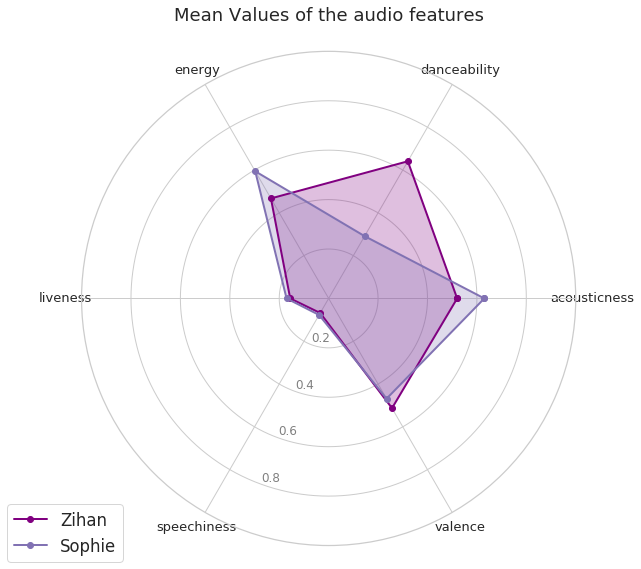

In [3]:
#EDA to compare our music tastes 
labels= list(my_features)[:]
stats= my_features.mean().tolist()
stats2=sophie_features.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2=np.concatenate((stats2,[stats2[0]]))
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=plt.figure(figsize = (20,20))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Zihan", color= 'purple')
ax.fill(angles, stats, alpha=0.25, facecolor='purple')

ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)

ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "Sophie", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m')

ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
fig.savefig("feature.png")

In [4]:
df.release_date = pd.to_datetime(df.release_date)

In [5]:
ten_most_popular_songs = df.sort_values('popularity', ascending = False).head(10)[['name', 'popularity']].reset_index().drop(['index'], axis = 1)
ten_most_popular_songs.head(10)

,name,popularity
0,Dance Monkey,94
1,I Like Me Better,85
2,wish you were gay,82
3,2002,82
4,Let's Fall in Love for the Night,82
5,Good as Hell (feat. Ariana Grande) - Remix,82
6,Summer Days (feat. Macklemore & Patrick Stump ...,81
7,Summer,81
8,Fix You,81
9,So Am I,81


In [6]:
#drop unnecessary models 
df = df.drop(['Unnamed: 0'], axis = 1)
df_sophie = df_sophie.drop(['Unnamed: 0'], axis = 1)

In [7]:
#add category (0/1) column to each dataset to indicate our preferences 
all_ones = np.ones(df.shape[0], dtype = 'int')
df['category'] = all_ones

all_zeros = np.zeros(df_sophie.shape[0], dtype = 'int')
df_sophie['category'] = all_zeros

In [8]:
#concat two dataframes into one for future classification
merged = pd.concat([df, df_sophie])
merged.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,category
0,Better Together,In Between Dreams,Jack Johnson,2005-01-01 00:00:00,207680,72,0.868,0.3080,0.347,0.000020,0.1100,-9.529,0.0536,0.659,110.059,4,1
1,Do You Remember,In Between Dreams,Jack Johnson,2005-01-01 00:00:00,144013,61,0.598,0.7620,0.289,0.000082,0.2620,-11.405,0.0334,0.714,92.035,4,1
2,I Got You,From Here To Now To You,Jack Johnson,2013-01-01 00:00:00,179346,64,0.899,0.6100,0.399,0.000015,0.0923,-6.553,0.0380,0.544,98.067,4,1
3,Over the Rainbow,Alone In Iz World,Israel Kamakawiwo'ole,2001-09-25 00:00:00,211933,71,0.671,0.9120,0.153,0.000055,0.0771,-13.569,0.0404,0.658,85.600,4,1
4,Crush,Crush,Tessa Violet,2018-06-15 00:00:00,216266,66,0.910,0.0302,0.401,0.000159,0.0801,-9.552,0.0855,0.824,135.994,4,1


In [9]:
#since machine learning models only take in numbers, I extracted the year from the release date as a potential feature
merged['release_date'] = pd.to_datetime(merged['release_date'])
merged['release_year'] = merged['release_date'].dt.year
merged.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,category,release_year
0,Better Together,In Between Dreams,Jack Johnson,2005-01-01,207680,72,0.868,0.3080,0.347,0.000020,0.1100,-9.529,0.0536,0.659,110.059,4,1,2005
1,Do You Remember,In Between Dreams,Jack Johnson,2005-01-01,144013,61,0.598,0.7620,0.289,0.000082,0.2620,-11.405,0.0334,0.714,92.035,4,1,2005
2,I Got You,From Here To Now To You,Jack Johnson,2013-01-01,179346,64,0.899,0.6100,0.399,0.000015,0.0923,-6.553,0.0380,0.544,98.067,4,1,2013
3,Over the Rainbow,Alone In Iz World,Israel Kamakawiwo'ole,2001-09-25,211933,71,0.671,0.9120,0.153,0.000055,0.0771,-13.569,0.0404,0.658,85.600,4,1,2001
4,Crush,Crush,Tessa Violet,2018-06-15,216266,66,0.910,0.0302,0.401,0.000159,0.0801,-9.552,0.0855,0.824,135.994,4,1,2018


In [10]:
merged = merged.drop(['release_date', 'name', 'album', 'artist'], axis = 1)

In [11]:
#define our features and labels 
features = merged.drop(['category'], axis = 1)
labels = merged['category']

In [12]:
#create a correlation matrix for our features 
corr_metrics = features.corr()
corr_metrics.style.background_gradient()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_year
length,1,0.090878,-0.0779498,-0.0710096,0.0943565,0.25584,-0.0558172,0.0480141,-0.107624,-0.240685,0.0617171,0.00528209,-0.0123723
popularity,0.090878,1,-0.215676,-0.00523457,0.239625,-0.204801,0.00751542,0.31089,0.0395257,-0.0854992,-0.0272408,0.143625,0.253277
danceability,-0.0779498,-0.215676,1,-0.313381,-0.436527,0.0110357,-0.104831,-0.332993,-0.0493424,0.12982,-0.156106,-0.135088,-0.204804
acousticness,-0.0710096,-0.00523457,-0.313381,1,-0.402082,0.0455993,0.0439407,-0.415771,0.0294208,-0.173854,-0.0903001,-0.083449,0.048656
energy,0.0943565,0.239625,-0.436527,-0.402082,1,-0.0725021,0.079292,0.811894,0.132714,0.224207,0.0677236,0.232644,0.204299
instrumentalness,0.25584,-0.204801,0.0110357,0.0455993,-0.0725021,1,0.0382638,-0.256069,-0.04974,0.0273218,-0.00437148,0.0148679,-0.00590299
liveness,-0.0558172,0.00751542,-0.104831,0.0439407,0.079292,0.0382638,1,-0.0572118,0.19207,-0.0995394,-0.0284841,-0.0429697,0.0589934
loudness,0.0480141,0.31089,-0.332993,-0.415771,0.811894,-0.256069,-0.0572118,1,-0.0387437,0.188554,0.0884765,0.267874,0.370656
speechiness,-0.107624,0.0395257,-0.0493424,0.0294208,0.132714,-0.04974,0.19207,-0.0387437,1,-0.0528328,0.0181465,-0.0669233,0.121799
valence,-0.240685,-0.0854992,0.12982,-0.173854,0.224207,0.0273218,-0.0995394,0.188554,-0.0528328,1,0.000923057,0.0459794,-0.228531


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Text(0.5, 0, 'Principal Component #')

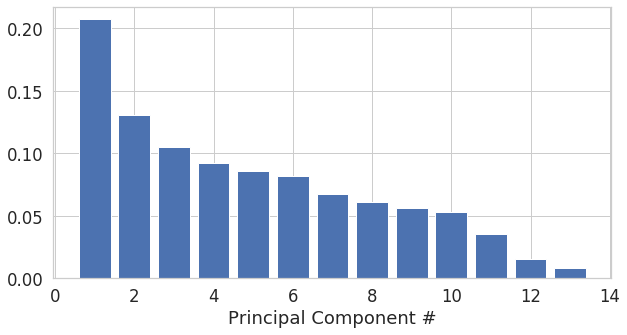

In [14]:
#use PCA to find out which features contribute more to the total variance 
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(np.arange(1, pca.n_components_ + 1), exp_variance)
ax.set_xlabel('Principal Component #')

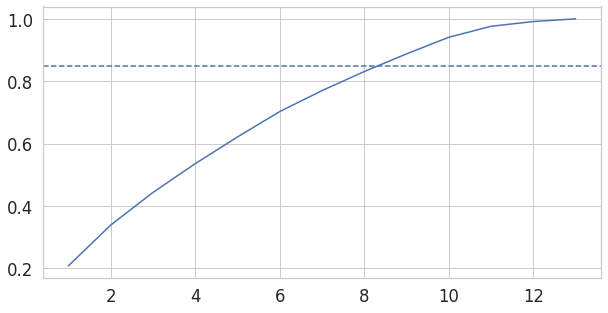

In [15]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(np.arange(1, pca.n_components_+1), cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

In [16]:
# choose the n_components where about 85% of our variance can be explained
n_components = 9

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)

In [17]:
#perform train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_projection, labels, test_size = 0.2)

In [18]:
#import all the classification models we might need 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
#import accuracy metrics 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [20]:
models_dict = {}

In [21]:
#Logistic Model 
Logreg = LogisticRegression()

#hyperparameters 
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg_cv = GridSearchCV(Logreg, param_grid, cv=5, scoring = 'roc_auc')
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.9008011642156862


/srv/app/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [22]:
logreg_best = LogisticRegression(C = logreg_cv.best_params_.get('C'))
logreg_best.fit(X_train, y_train)
models_dict[logreg_best] = logreg_cv.best_score_

In [23]:
#DecisionTree Classifier 
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.tree_.max_depth

7

In [24]:
#Hyperparameters 
param_dist = {"max_depth": np.arange(1, 8),
              "max_features": np.arange(1, 10),
              "min_samples_leaf": np.arange(1,10),
              "criterion": ["gini", "entropy"]}
tree_cv = GridSearchCV(tree, param_dist, cv=5, scoring = 'roc_auc')

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned DecisionTree Classifier Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned DecisionTree Classifier Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 8}
Best score is 0.9067394301470589


/srv/app/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [25]:
tree_best = DecisionTreeClassifier(max_depth = tree_cv.best_params_.get('max_depth'),
                                  max_features = tree_cv.best_params_.get('max_features'),
                                  min_samples_leaf = tree_cv.best_params_.get('min_samples_leaf'),
                                  criterion =  tree_cv.best_params_.get('criterion'))
tree_best.fit(X_train, y_train)
models_dict[tree_best] = tree_cv.best_score_

In [26]:
from sklearn.model_selection import validation_curve 

In [27]:
#RandomForest Classifier 
rand_tree = RandomForestClassifier()
rand_tree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
n_estimators = [100, 300, 500]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5, 10] 

param_forest = {"max_depth": np.arange(1, 32),
              "max_features": np.arange(1,10),
              "min_samples_leaf": np.arange(1, 10),
              "n_estimators": np.arange(100,500,100),
              "criterion": ["gini", "entropy"]}

rand_tree_cv = RandomizedSearchCV(rand_tree, param_forest, cv = 3, verbose = 1, 
                      n_jobs = -1)
rand_tree_cv.fit(X_train, y_train)
print("Tuned RandomForest Classifier Parameters: {}".format(rand_tree_cv.best_params_)) 
print("Best score is {}".format(rand_tree_cv.best_score_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.4s finished
/srv/app/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Tuned RandomForest Classifier Parameters: {'n_estimators': 300, 'min_samples_leaf': 3, 'max_features': 7, 'max_depth': 9, 'criterion': 'gini'}
Best score is 0.8375


In [29]:
rand_tree_best = RandomForestClassifier(max_depth = rand_tree_cv.best_params_.get('max_depth'),
                                  max_features = rand_tree_cv.best_params_.get('max_features'),
                                  min_samples_leaf = rand_tree_cv.best_params_.get('min_samples_leaf'),
                                  criterion =  rand_tree_cv.best_params_.get('criterion'),
                                  n_estimators = rand_tree_cv.best_params_.get('n_estimators'))
rand_tree_best.fit(X_train, y_train)
models_dict[rand_tree_best] = rand_tree_cv.best_score_

In [30]:
# Setup the hyperparameter grid
KNN = KNeighborsClassifier()
param_KNN = {"n_neighbors": np.arange(1, 10),
              "weights": ['uniform','distance']}

KNN_cv = GridSearchCV(KNN, param_KNN, cv=5, scoring='roc_auc')

# Fit it to the data
KNN_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(KNN_cv.best_params_)) 
print("Best score is {}".format(KNN_cv.best_score_))

Tuned KNN Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best score is 0.9505445772058823


/srv/app/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [31]:
KNN_best = KNeighborsClassifier(n_neighbors = KNN_cv.best_params_.get('n_neighbors'),
                               weights = KNN_cv.best_params_.get('weights'))
KNN_best.fit(X_train, y_train)
models_dict[KNN_best] = KNN_cv.best_score_

In [32]:
print(models_dict)

{LogisticRegression(C=0.4393970560760795, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False): 0.9008011642156862, DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'): 0.9067394301470589, RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=

In [33]:
#SVC 
svc = SVC()

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

svc_cv = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc')

# Fit it to the data
svc_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned SVC Parameters: {}".format(svc_cv.best_params_)) 
print("Best score is {}".format(svc_cv.best_score_))

Tuned SVC Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score is 0.9574846813725489


/srv/app/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [34]:
svc_best = SVC(C = svc_cv.best_params_.get('C'),
              gamma = svc_cv.best_params_.get('gamma'),
              kernel = svc_cv.best_params_.get('kernal'))
#svc_best.fit(X_train, y_train)
#models_dict[svc_best] = svc_cv.best_score_

In [35]:
sort_dict = sorted(models_dict.items(), key=lambda x: x[1], reverse=True)
for i in sort_dict:
    print(i[0], i[1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance') 0.9505445772058823
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 0.9067394301470589
LogisticRegression(C=0.4393970560760795, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 0.9008011642156862
RandomForestClas

In [36]:
#the best model seems to be KNN
# Compute predicted probabilities: y_pred_prob
y_pred_prob = KNN_best.predict_proba(X_test)[:,1]
final_accuracy = roc_auc_score(y_test, y_pred_prob)
final_accuracy

0.9948849104859334

In [37]:
def compare_models(models):
    # Compute the cross validation error for each model
    validation_roc_auc = [score for score in models.values()]
    
    names = list(models_dict.keys())
    fig = go.Figure([
        go.Bar(x = names, y =validation_roc_auc, name="CV roc_auc")])
    return fig

In [38]:
#compare_models(models_dict)

In [39]:
#concatenate two dataframes 
#add a column that indicates the category 
#use PCA to analyze the top components in terms of variance contribution 
#identify the best scalar / model combination 
#use gridsearch to tune the hyper parameters 
#test for accuracy and summarize 
